In this virtual lab, we'll be focusing on classification tasks as well as measuring their accuracy scores. We'll be using Scikit-learn's famous MNIST dataset in order to correctly classify images of digits. For example, your models should be able to decipher whether an image of a 4 will correctly be classified as "4".

Scikit-learn has some helper functions to help us explore the MNIST dataset. You'll see those functions in some of the code blocks below.

**Side-node**: I'll be heavily referencing from ["Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow"](https://https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646) by Aurélien Géron. It's a fantastic book which I recommend to any aspiring ML/DL practitioner!

Let's make sure to import the appropriate modules to start us off with our exploration tasks. 

In [18]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

The MNIST dataset is a labeled one, meaning that there are target values (or classes) that are already mapped to each value. Knowing this will inform the type of models we will choose later on in the classification task. 

Let's look at the MNIST data in more detail. A key component to look out for is features. Features can be defined as the types of attributes that holds key information to do our classification task on. In the case of images, the features we are looking for are the pixels. 

In [ ]:
X, y = mnist["data"], mnist["target"]
X_images, y_images = X.shape[0], y.shape[0] 
X_features = X.shape[1]
print("There are {} images in the main dataset.\nThere are {} images in the target.".format(X_images, y_images))
print("There are {} features in the main dataset.".format(X_features))

So, let's discuss how we're retrieving this information. In the case of images, the pixels are stored as [numpy multi-dimensional arrays](https://numpy.org/doc/stable/reference/arrays.ndarray.html), with values from 0-255. Within our datasets, they are stored in in larger array within a [dictionary](https://www.tutorialspoint.com/python/python_dictionary.htm) (the key is "data" whereas the value is the actual array containing the images). Therefore, we're able to use the shape attribute/property in order to retrieve how many images and features we're dealing with. The target variable should ALWAYS have the same amount of data as our main dataset, with a shape of (N, 1). Otherwise, there will be a dimensional mismatch and classification cannot be achieved. 

The reason why there are 784 features is due to the size of the image. Each image is 28 x 28 pixels, which we will take look at in the next code block. 

In [ ]:
from matplotlib import pyplot as plt #a very helpful module for data visualization 

digit = X[0]
digit_image = digit.reshape(28, 28) #need to reshape as the default shape is (784,)

plt.imshow(digit_image, cmap="binary")
plt.axis("off")
plt.show()
print("The class for this image is {}.".format(y[0]))

As you can see, we have a digit from our dataset that looks like "5". The associated label for this image is indeed "5" as well. This information will be helpful for us when testing our classification models later on.

Speaking of which, let's start to divie up our dataset into two sets, one for training and one for testing. In Machine Learning, it's a very good rule of thumb to have a training and testing set (sometimes, a validation set as well as an interim), so that way, you're able to adjust, tune, and correct for any mishaps that may happen during the training session. The experimentation done on the training set will allow you to infer what can happen in the testing set. Generally, if all goes well on the training set, these results may replicate on the testing set as well. Therefore, it's highly important to make your training set as large as possible (2:1 or 3:1 ratio is a good place so divide your main dataset as training and testing respectively).

Let's apply this heuristic to our MNIST dataset now. We'll split the images 6:1 (60,000 images for the training and the last 10,000 images for testing). 

**Side-note:** It's also a good idea to shuffle your datasets around so your classifier will be able to generalize for any similar datasets for further application. There are plenty of ways to do so, i.e., using [Stratified K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), [Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html), etc. We'll touch upon this later on in this notebook.

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #we can utilize the power of Python slicing to split our dataset

We'll start of smaller here with our dataset. Suppose if we want to use our data to just classify for any "5" that we have. We'll use that same 5 we saw before in order to check if our classifier is predicting correctly. The task that I'm describing is a binary classification task as we're just checking for values that are "5" and "not 5". This will inform which classifiers we can use for a task such as this.

In [ ]:
y_train_5 = (y_train == '5') #applying a mask to select all target values that are equal to 5
y_test_5 = (y_test == '5')

y_train_5

Now, that we've split our dataset and target into training and testing sets and targets and defined our task, let's get into the fun part--training a classifier. We'll start of simple here, using a Logistic Regressor model. Although, "regressor" is in the name, the Logistic Regression model uses "logits" (applying the log function) in order to classify data by calculating its probabilites to see which piece of data is more likely to be put in a certain class. It's also a binary classifier model, so for multi-classification (which we will get to later), we will not be able to use this classifier. 

[Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) has a great explanation and the formulas if you'd like to know the math behind the model. 



In [ ]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(random_state=42) #rule of thumb: always set the random_state to 42 to have reproducible results! 
lg_clf.fit(X_train, y_train_5) #applying the classifier to our training sets FIRST!

As you can see, fitting the classifier to our data and target yields all of the hyperparameters that were set either by default or by us. Hyperparameter tuning is essential in the world of Machine Learning, as it allows us to get the most bang for our buck in the models we're using. We'll be covering hyperparameter tuning later on in the notebook as bonus.

So, let's see if our binary classifier will yield a correct prediction! We'll be checking if our previous digit will be classified correctly. 

In [24]:
lg_clf.predict([digit])

array([ True])

A little nugget of success! Now, let's see how can evaluate our model. Model evaluation is a very crucial step in the process as it allows us to measure how well our models will do for further application. There are plenty of ways to do this, but we'll be mainly focusing on Cross-Validation, Precision and Recall (using a Confusion Matrix) and the ROC (receiver operating characteristic) Curve.

Let's see how we can combine the first two. With predicting with cross validation, it helps us split up the training sets into an n-amount of "folds" in order to get predictions made on each testing fold. Therefore, we'll yield predictions that never saw the data during training and will give us the most "pure" prediction scores. 

Afterwards, we'll be using the prediction scores from the cross validation to input into our confusion matrix. More on that later.


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 

y_train_pred = cross_val_predict(lg_clf, X_train, y_train_5, cv=3) #set our cross-validation for 3 for now 
confusion_matrix(y_train_5, y_train_pred)

Let's dissect this confusion matrix. We have these quadrants which signifies the amount of positives and negatives that correctly and incorrectly classified. 

In the first row, we see have 54,038 images that were correctly classified as "non-5s". These are our true negatives. However, we have 541 images that were incorrectly classified as "5s". Those are our false positives. In the second row, we have 1,026 images that were wrongly classified as "non-5s" (false negatives), and 4,395 images that were correctly classified as "5s". 

So, with this confusion matrix, we can plainly see which images were correctly classified and which were not. However, we can further supplement this process with using a more interpretable metric, "precision and recall". 

The precision score looks at the accuracy of the positive predictions. The formula behind it is quite simple. 

TP = no. of True Positives | FP = no. of False Positives 

> $precision=\frac{TP}{TP+FP}$

However, this doesn't tell the whole story as we need to decipher the number of negatives in a binary classification. This is where recall (or sensitivity) comes in, which takes considers the false negatives as a way to get the true positive ratio (TPR). 

FN = no. of False Negatives 

> $recall=\frac{TP}{TP+FN}$

Let's see how we can use both of these scores and draw some conclusions about our classifier so far. 

In [26]:
from sklearn.metrics import precision_score, recall_score 

p_score = precision_score(y_train_5, y_train_pred)
r_score = recall_score(y_train_5, y_train_pred)
print("Precision Score of Binary Classifer: {}".format(p_score))
print("Recall Score of Binary Classifier: {}".format(r_score))

Precision Score of Binary Classifer: 0.8903970826580226
Recall Score of Binary Classifier: 0.8107360265633647


As we can observe, the precision score allows us to see that if the image looks like a 5, our model classifies it correctly ~89% of the time, which is pretty good! However, the recall score allows us to see that it only detects 81%  of the actual 5s. Not as bad, but that's the *trade-off* that we have to deal with. With precision and recall, there are factors that you have to consider when achieving a high score for either. Depending on the classifier you're building, you might be okay with having a high precision score, but low recall and vice-versa. If you want to build a classification filter of some sort, having a low recall might be okay as long as the precision is high (i.e. our binary classifier here). 


We can also add some thresholding here in order to mitigate our precision/recall trade-off. We can compute the score of our classifier based on a decision funcion. If a score is greater than our threshold, it assigns it to a positive class, negative otherwise. There is no direct way of determining the threshold, but there a couple of plots we can use in order to determine the ideal threshold. We'll going over one of them which is easier to interpret. 

In [27]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(lg_clf, X_train, y_train_5, cv=3, method='decision_function') #using CV w/ prediction to use the scores for our thresholds

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


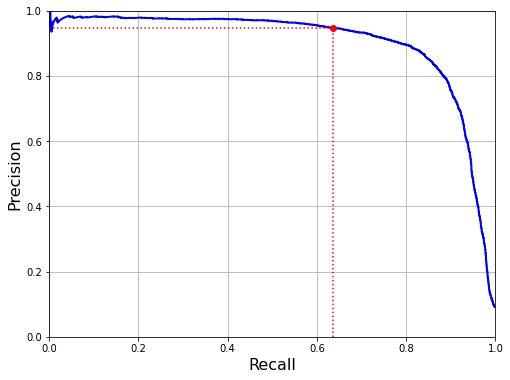

In [28]:
def plot_precision_vs_recall(precisions, recall):
  plt.plot(recalls, precisions, 'b-', linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.6368, 0.6368], [0., 0.946], "r:")
plt.plot([0.0, 0.6368], [0.946, 0.946], "r:")
plt.plot([0.6368], [0.946], "ro")
plt.show()

So, as we can see, our precision starts to decline around 95%, so it's best for us to choose that line. However, you can clearly see that there is a clear trade-off the recall. We'll end up having about ~60% with this high amount of precision. Again, depending on the task, you might want to choose a higher recall and sacrifice the precision score. In this case, we're doing the opposite.

In [29]:
import numpy as np 

threshold_95_precision = thresholds[np.argmax(precisions >= 0.95)] #use argmax to give us the lowest threshold starting at 95%
y_train_pred_95 = (y_scores >= threshold_95_precision)

ps_95 = precision_score(y_train_5, y_train_pred_95)
rs_95 = recall_score(y_train_5, y_train_pred_95)

print("Precision score with a 95% threshold: {}".format(ps_95))
print("Recall score with a 95% threshold: {}".format(rs_95))

Precision score with a 95% threshold: 0.95
Recall score with a 95% threshold: 0.6203652462645268


So as we see, we have our 95% precision binary classifier, which a trade-off of ~62% for recall! In Machine Learning, there are similar trade-offs that you'll need to make when building and deploying models. Always consider the constraints of your project/task and ask your co-workers the sacrifices you're willing to make with your model. 

Now, let's head onto our last evaluating method today, ROC curve. It's highly similar to the precision/recall curve, but instead we use the true positive rate (TPR) against the false positive rate (FPR). As implied the FPR is the ratio of the negatives that were incorrectly classified as positive (equivalent to 1 - TNR (true negative rate, also known as specificity)). Therefore, the ROC curve plots *sensitivity* (recall/TPR) versus 1 - *specificity* (FPR).  

In [30]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) #similar to applying the precision_recall_curve function

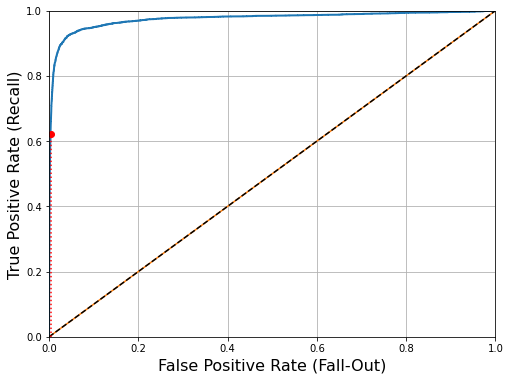

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])                                   
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
  plt.grid(True)                                           

plt.figure(figsize=(8, 6))                        
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.6203], "r:")
plt.plot([0.0, 4.837e-3], [0.6203, 0.6203], "r:")  
plt.plot([4.837e-3], [0.6203], "ro")               
plt.show()

As we can see from our plot here, the FPR is compared to the TPR for all possible thresholds, and the red point denotes the chosen ratio at ~62% recall. 

We can also evaluate a classifier using the area under the curve (AUC) in conjunction with ROC. The closer classifier is to 100%, the more "perfect" the classifier will be. Here's an example below.

In [32]:
from sklearn.metrics import roc_auc_score 
rocauc_score = roc_auc_score(y_train_5, y_scores)
print("The ROC-AUC score for our binary classifier is {}.".format(rocauc_score))

The ROC-AUC score for our binary classifier is 0.9748675206695862.


From our ROC-AUC score, we've yielded a pretty high percentage. However, it's important to use different evaluation metrics as solely one doesn't tell the entire story. The only reason why we've yielded such a high score is because there are very few positives compared to negatives, where our previous evaluation using precision vs recall told us that we can do even better with a score of 81%. 

**Exercise #1:** What if we wanted to do some model comparisons? Let's say, we chose Stochastic Gradient Descent or Random Forest Classifier for our same sets of data and wanted to see if we can do better from our simple Logistic Regression model. How can we leverage the metrics we've just gone through in order to do a successful comparison?

**HINT:** Follow the same exact steps from precision vs. recall to ROC-AUC. You can either show the results side-by-side or overlap them on the same graph. In order to overlap the previous results with the current results, you'll just need use the .plot() function twice (or more) over in order to plot the previous result with the current. For example: 

In [33]:
'''
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
'''

'\nplt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")\nplt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")\nplt.plot([4.837e-3], [0.4368], "ro")\nplt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")\nplt.plot([4.837e-3], [0.9487], "ro")\n'

Link to solution if you'd like to take a look! 

Now, we've successfully built our first binary classifier and evaluated it, you're probably wondering that if we've built a classifier to detect what is 5 and what is not 5, then what about the digits? How can we distinguish a 1 from a 2, and a 3 from a 6? Enter in, multiclass classification! 

As established before, Logistic Regression is best suited for binary classification (although it can handle multiclass classification, there are much better models which are inherently built for multiple classes). We can look at the other models that we've spoken about briefly in the lecture, Stochastic Gradient Descent (SGD), Random Forest classifiers, and other tree-like algorithms can definitely handle and scale well to large datasets with multiple classes. 

Now, let's use SGD on the entire labeled data (instead of the filtered labeled data for "5") and see what we will yield from this.

In [34]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([digit]) #using the same digit we defined before ("5")

array(['3'], dtype='<U1')

As you can see, our SGD classifier didn't get the correct prediction. We can further see what would be our accuracy outlook through a quick cross validation scoring as well. Cross validation scoring differs from prediction by taking the average of each accuracy score within each fold, whereas CV prediction will give us the actual predicted values.

In [35]:
from sklearn.model_selection import cross_val_score 
cv_score_sgd = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')
print("Our cross-validation scores are {}.".format(cv_score_sgd))

Our cross-validation scores are [0.87365 0.85835 0.8689 ].


As we can see, our accuracy scores are pretty good, but seeing that it wasn't able to classify our "5" correctly earlier on, we can plainly see that we can do better. We can utilize another aspect of Machine Learning in order for us to improve upon our current model. 

Introducing, hyperparameter tuning. Do you notice the some of the parameters we use for the classifiers (i.e. random_state)? These are the parameters that we can tune in order to yield the best results from our model. In order to efficiently tune our models, we can build a pipeline to pass in our model and any other pre-processing methods (i.e. [scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)). Then, we can go through a combination of values per parameter via a [straightforward grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV) or a [randomized cross-validation search](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=random%20search#sklearn.model_selection.RandomizedSearchCV). The latter is much faster than the former, so let's settle with this for now. 

With tuning our models, there are a set of values for each parameter that we can use. In the code below, I've settled on some values we can use for each parameter of our SGDClassifier. 

**NOTE**: Running a search will most likely take some time depending on how many parameters you're using and the number of values for each parameter. Randomized search does take a shorter amount of time compared to a straightforward grid search.

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

pipe = Pipeline([('preprocessing', MinMaxScaler()),  #scales our data uniformly in order to get a more accurate result from our model
                 ('classifier', SGDClassifier())])
               
params =  {'classifier': [SGDClassifier()], 
         'preprocessing': [MinMaxScaler(feature_range=(0, 1))], 
         'classifier__loss': ['hinge', 'log', 'perceptron'], #different loss functions to minimize our cost
         'classifier__penalty': ['l1', 'l2', 'elasticnet'], #different types of regularization methods (decreases the variance in model)
         'classifier__alpha': [0.1, 0.001, 0.0001]} #a weight that is added to the regularization term
  


In [ ]:
rscv = RandomizedSearchCV(pipe, params, n_iter=100, verbose=2, cv=3, random_state=42, n_jobs=-1)
rscv.fit(X_train, y_train)

In [44]:
sgd_best = rscv.best_params_['classifier'] #using the .best_params_ attribute to retrieve our classifier 

Great, so we've retrieved our optimized version of the SGD Classifier. Let's now put it to the test. We're going to apply more scrutiny to our classifier by doing more error analysis this time around. Remember the confusion matrix from before? We're going to use that on the entire dataset instead of the filtered one in order to see how our optimized SGD classifier will fair with classifying all of the labels correctly. 

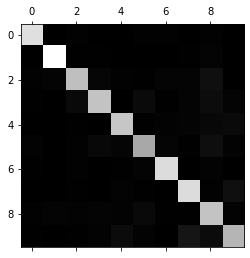

In [46]:
y_train_pred = cross_val_predict(sgd_best, X_train, y_train, cv=3)
confusion_matrix = confusion_matrix(y_train, y_train_pred)

#let's highlight the errors using matshow()
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()  

So, as we can see. 

Alright, so let's focus on the errors and plot them. We'll need to divide each value in the matrix by the number of the images in each respective class to compare each error rate (instead of number of errors). 

In [ ]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True) #summing each row of the confusion matrix
normalized_confusion_matrix = confusion_matrix/row_sums #divding the entire confusion matrix by each row sum

np.fill_diagonal(normalized_confusion_matrix, 0) #fill up diagonal with zeros to maintain only the errors 
plt.matshow(normalized_confusion_matrix, cmap=plt.cm.gray)
plt.show()

So now we can observe the kinds of errors the classifier makes via a confusion matrix. The rows are the actual classes while the columns are the predicted classes (recall from our earlier example of a confusion matrix). The brighter the color is on a column, that higher the misclassification of that image. So, in this case we have a lot of misclassification with 8, so we should try to improve our classifier in order to make sure we minimize the errors with classifying 8.


**Exercise #2:** Experiment with hyperparameter tuning. Look into the [many classifiers](https://https://scikit-learn.org/stable/supervised_learning.html) that you can use and try each one with the pipeline that we've created. You can also use the SwitchClassifier class which is provided in this directory for your code to add more than one classifier to the pipeline and the parameter grid. Just pass it as a the base classifer in your pipeline and add the rest of the classifers to the parameter grid as accordingly. No solutions for this exercise as this is for your experimentation.

**Exercise #3:** Remember the multi-label classification from the lecture? Suppose if we wanted to output multiple labels for each image (i.e. False for an image under 5 and True for an image over 5), how would we go about doing that? I've started you off with some code below to filter out the dataset (although you can modify and try different examples of your own). Think about the classifier you'd like to use and utilize some of the different metrics you've previously learned to evaluate your classifier. **HINT**: The process to do so is every similar to how we've chosen our classifier and evaluated it for our binary classifier. 


In [62]:
y_train_large = (y_train >= '5')
y_train_two = (y_train == '2')
y_multilabel = np.c_[y_train_large, y_train_two]

Good job on making it through today's lab! You're well on your way to becoming a potential ML practitioner. There are plenty of other resources out there to deepen your understanding of machine learning, but one highly recommended course to take is Andrew Ng's [Machine Learning course on Coursera](https://https://www.coursera.org/learn/machine-learning). Just be forewarned that he does use Octave which is very similar to MATLAB in syntax. You can just follow along using Python, and there are plenty of people who've attempted the course in Python as well.